## Business Understanding
Based on the available data seeing below, we asked ourselves the following questions:

1. The dependency between price and season
2. How well can we predict prices and what are the big contributing factors
3. The dependency between review comment's sentiment and season 
For answering these questions, we will use data from calendar, reviews and listings databases.

This notebook focuses on the third question. To answer this question, we'll first apply a sentiment analyzer and add columns for negativity, positivity and neutral raitngs to the df. Next, we'll plot the mean negativity, positivity and neutral raitngs for every month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect


#create df for calendar.csv
df1 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\calendar.csv')
df1.head(30)


[nltk_data] Downloading package vader_lexicon to C:\Users\dontknowVP\a
[nltk_data]     naconda3\envs\TensorFlow\lib\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [2]:
#create df for listings.csv
pd.set_option('display.max_columns', None)
df2 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\listings.csv')
df2.head(2)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [3]:
#create df for reviews.csv
pd.set_option('display.max_columns', None)
df3 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\reviews.csv')
df3.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


Question 3: Dependency between season and review sentiment

In [4]:
#apply sentiment analyzer, create new columns with sentiment values for negative, positive and neutral
df=df3.dropna()
sid = SentimentIntensityAnalyzer()

df['neg']=0.0
df['pos']=0.0
df['neu']=0.0

for index,row in df.iterrows():
    ss = sid.polarity_scores(row['comments'])
    df.at[index,'neg'] = ss['neg']
    df.at[index,'pos'] = ss['pos']
    df.at[index,'neu']= ss['neu']
df.head()

C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,listing_id,id,date,reviewer_id,reviewer_name,comments,neg,pos,neu
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,0.000,0.538,0.462
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0.000,0.391,0.609
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",0.043,0.185,0.772
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,0.035,0.200,0.765
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0.000,0.345,0.655


## Data Preparation
Converting the data types into suitable types. Since month cannot be str type we add a column of month in float type. Also, since the sentiment analyzer can only analyze english reviews, we use a language detection function and add a column labeling the language used for the reviews.

In [5]:
#The sentiment analyzer only works for english reviews, hence we must drop rows with different language
#add langauge column
def detect_language(sente):
    '''
    INPUT:
    sente - string
    
    Output:
    string - string, denoting language of input string 'sente'
    '''
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"
    
counter=0#(84831, 9)
def language(row):
    '''
    INPUT:
    row - row of df
    
    Output:
    string - string, denoting language extracted by row
    '''
    global counter
    counter+=1
    if counter % 1000 == 0:
        print(counter, '/', 84831) #includes counter to show progress, as calculation time is long
    return detect_language(row['comments'])
df['language']=df.apply(lambda row: language(row), axis=1)

1000 / 84831
2000 / 84831
3000 / 84831
4000 / 84831
5000 / 84831
6000 / 84831
7000 / 84831
8000 / 84831
9000 / 84831
10000 / 84831
11000 / 84831
12000 / 84831
13000 / 84831
14000 / 84831
15000 / 84831
16000 / 84831
17000 / 84831
18000 / 84831
19000 / 84831
20000 / 84831
21000 / 84831
22000 / 84831
23000 / 84831
24000 / 84831
25000 / 84831
26000 / 84831
27000 / 84831
28000 / 84831
29000 / 84831
30000 / 84831
31000 / 84831
32000 / 84831
33000 / 84831
34000 / 84831
35000 / 84831
36000 / 84831
37000 / 84831
38000 / 84831
39000 / 84831
40000 / 84831
41000 / 84831
42000 / 84831
43000 / 84831
44000 / 84831
45000 / 84831
46000 / 84831
47000 / 84831
48000 / 84831
49000 / 84831
50000 / 84831
51000 / 84831
52000 / 84831
53000 / 84831
54000 / 84831
55000 / 84831
56000 / 84831
57000 / 84831
58000 / 84831
59000 / 84831
60000 / 84831
61000 / 84831
62000 / 84831
63000 / 84831
64000 / 84831
65000 / 84831
66000 / 84831
67000 / 84831
68000 / 84831
69000 / 84831
70000 / 84831
71000 / 84831
72000 / 84831
7

C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
#add column for month
def label_month(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    int - int, denoting the month extracted from row
    '''
    return int(row['date'][5]+row['date'][6])

df['month']=df.apply(lambda row: label_month(row), axis=1)
print('finished month')


finished month


C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [7]:
#drop every row with no english review
df=df[df['language']=='en']

## Data Modeling
plot mean sentiments for every month

[0.30282026028842723, 0.30436836071837886, 0.303544991511035, 0.3036957456978962, 0.302073010380623, 0.2960320596238025, 0.293874951681485, 0.29526165601122656, 0.29722201023328393, 0.3042306994671793, 0.3061358605003784, 0.30720152024041025]


Text(0, 0.5, 'mean positive sentiment')

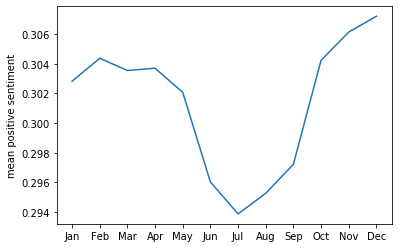

In [8]:

#plot mean sentiments
monthly_avg_pos=[]
for i in range(0,12):
    monthly_avg_pos.append(df[df['month']==i+1]['pos'].mean())
print(monthly_avg_pos)
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.plot(months, monthly_avg_pos)
plt.ylabel('mean positive sentiment')

The plot suggests that reviews are less positive during summer season

[0.01347133309883924, 0.011872372946121496, 0.012774436090225584, 0.012907504780114714, 0.012507093425605575, 0.01269927836271155, 0.012959798994974965, 0.013309761422111327, 0.013082213164513102, 0.012353474662736735, 0.012316906747536074, 0.012287431500795521]


Text(0, 0.5, 'mean negetive sentiment')

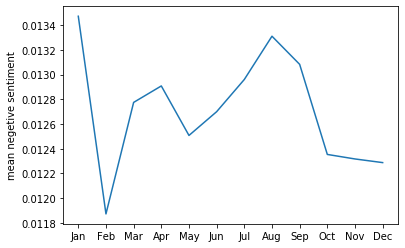

In [24]:
monthly_avg_neg=[]
for i in range(0,12):
    monthly_avg_neg.append(df[df['month']==i+1]['neg'].mean())
print(monthly_avg_neg)
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.plot(months, monthly_avg_neg)
plt.ylabel('mean negetive sentiment')

The plot suggests there is no clear trend for negativity

[0.6837143862117493, 0.6837573557508609, 0.6836810574824168, 0.6834034416826, 0.6854176470588231, 0.691268543712294, 0.6931664089679145, 0.6914239825354759, 0.6896926545832964, 0.6834162793334101, 0.6815476876421501, 0.6805089269931048]


Text(0, 0.5, 'mean neutral sentiment')

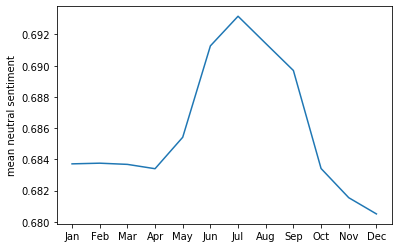

In [10]:
monthly_avg_neu=[]
for i in range(0,12):
    monthly_avg_neu.append(df[df['month']==i+1]['neu'].mean())
print(monthly_avg_neu)
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.plot(months, monthly_avg_neu)
plt.ylabel('mean neutral sentiment')

The plot suggests the reviews are more neutral during summer season

In [22]:
#check comments with extreme neutral sentiment rating
pd.set_option('display.max_colwidth', None)
df[df['neu']>0.7].head(60)['comments']


783                                         Nice location, clean room.\r\nThanks
801                                                                      Thanks 
1094                                 Excellent flexibility & comfortable house. 
1466                                                           Great.   Loved it
1709                                    Great experience ! Perfect location!\r\n
2142     Excellent room, lovely host, great location. Quiet, clean, comfortable.
2869                                        Great location and super great host.
2876                        Great place! Clean, comfortable bed. Great location!
4298                                                                  Great host
4530                                                                Great place!
5392                                                                       Great
5475                                                                       Great
5487                        

In [23]:
df[df['comments']=='Fantastic flat, fantastic location, great host! A truly great stay.']

,listing_id,id,date,reviewer_id,reviewer_name,comments,neg,pos,neu,language,month,auto_posting
25352,4009508,38205508,2015-07-13,17048509,Alexandros,"Fantastic flat, fantastic location, great host! A truly great stay.",0.0,0.823,0.177,en,7,False


In [12]:
#Many of the neutral reviews are 'automated', hence we check whether or not there are more automated reviews during summer
#add automated_posting column 
def auto_posting(row):
    return ('automated' in row['comments'])

df['auto_posting']=df.apply(lambda row: auto_posting(row), axis=1)


[0.007386563489271896, 0.01146350783339702, 0.010671840892553965, 0.010277246653919695, 0.013494809688581315, 0.010292203951259907, 0.008987243911867027, 0.008732262591610791, 0.008238661000780505, 0.008048974039224577, 0.010765731614859742, 0.011666961286901185]


Text(0, 0.5, 'mean auto_posting')

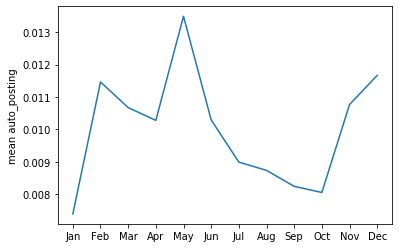

In [13]:
#check for mean auto_posting
monthly_avg_auto_posting=[]
for i in range(0,12):
    monthly_avg_auto_posting.append(df[df['month']==i+1]['auto_posting'].mean())
print(monthly_avg_auto_posting)
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.plot(months, monthly_avg_auto_posting)
plt.ylabel('mean auto_posting')

There is no clear indication for more neutral reviews during July, even though in July the neutrality was the highest. Hence, auto_postings are not responsible for the more neutral reviews during july.

In [14]:
#check comments in july
df[df['month']==7].head(60)['comments']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Evaluation
While there is a visible trend for more neutral comments and less positive comments during summer, the negativity doesn’t follow a trend. 
